In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# removing irrelevent features

df = df.drop(columns=['who', 'adult_male','deck', 'embark_town', 'alive', 'class', 'alone'], axis=1)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [9]:
df['age'] = df['age'].fillna(df['age'].median())
df.dropna(inplace=True)
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [10]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex']) # male = 1, female = 0
df['embarked'] = le.fit_transform(df['embarked']) # C=0, Q=1, S=2

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
X = df.drop(columns=['survived'], axis=1)
y = df['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
pipe = Pipeline([
	('scaler', StandardScaler()),
 	('model', LogisticRegression())
])

In [22]:
param_grid = {
	'model__C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
 	'model__penalty': ['l1', 'l2'],	 # Regularization types
 	'model__solver': ['liblinear']	  # Required for L1 penalty
}


In [23]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [24]:
grid.fit(X_train, y_train)

,estimator,Pipeline(step...egression())])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [25]:
y_pred = grid.predict(X_test)

In [36]:
print("Best Parameters : ", grid.best_params_)
print(grid.best_score_)

Best Parameters :  {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
0.7974293312321482


In [26]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("Classification report : \n", classification_report(y_test, y_pred))

Accuracy :  0.7808988764044944
Confusion matrix : 
 [[87 22]
 [17 52]]
Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.70      0.75      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



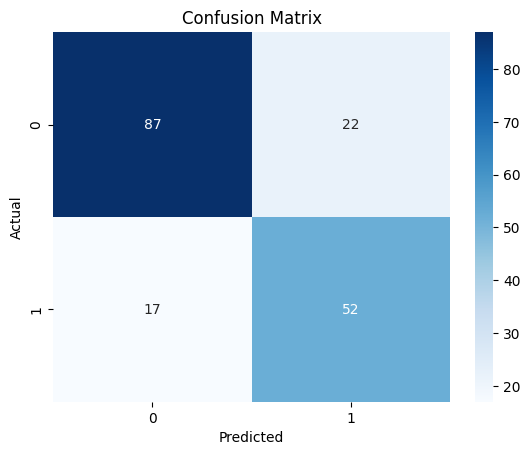

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()